In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import openweathermapy.core as owm

from api_keys import api_key
settings = {"units": "metric", "appid": api_key}

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city_data not in cities:
        cities.append(city_data)

# Print the city count to confirm sufficient count
len(cities)

634

In [13]:
weather_data = []

print("Beginning Data Retrieval")
print("---------------------------------")
counter = 1
set_counter = 1 
for city in cities:
    try:
        data = owm.get_current("{},{}".format(city.city_name, city.country_code), **settings)
        Cityname = city.city_name
        Cloudiness = data['clouds']['all']
        Country = data['sys']['country']
        Date = data['dt']
        Humidity = data['main']['humidity']
        Lat = data['coord']['lat']
        Lng = data['coord']['lon']
        Max_Temp = data['main']['temp_max']
        Wind_Speed = data['wind']['speed']
        if counter <= 50:
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
            counter += 1
        else:
            counter = 1
            set_counter += 1 
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
        weather_data.append({'City': Cityname, 'Cloudiness': Cloudiness, 'Country': Country, "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    
#    
    

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | chara
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | manaus
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | rapid valley
City not found. Skipping...
Processing Record 15 of Set 1 | gizo
Processing Record 16 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | plettenberg bay
Pr

Processing Record 28 of Set 4 | sorong
City not found. Skipping...
Processing Record 29 of Set 4 | port augusta
Processing Record 30 of Set 4 | ranong
Processing Record 31 of Set 4 | chicama
City not found. Skipping...
Processing Record 32 of Set 4 | xuddur
Processing Record 33 of Set 4 | marawi
Processing Record 34 of Set 4 | rawson
Processing Record 35 of Set 4 | tiksi
City not found. Skipping...
Processing Record 36 of Set 4 | bilma
Processing Record 37 of Set 4 | qandala
Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | cascais
Processing Record 40 of Set 4 | wanaka
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | soyo
City not found. Skipping...
Processing Record 43 of Set 4 | ocala
City not found. Skipping...
City not found. Skipping...
Processing Record 44 of Set 4 | oranjemund
City not found. Skipping...
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | sretensk
Processing Record 47 of Set 4 | batken
Processi

Processing Record 3 of Set 8 | surazh
Processing Record 4 of Set 8 | alta floresta
Processing Record 5 of Set 8 | kavieng
Processing Record 6 of Set 8 | apt
Processing Record 7 of Set 8 | puerto carreno
Processing Record 8 of Set 8 | baykalovo
City not found. Skipping...
Processing Record 9 of Set 8 | lerwick
Processing Record 10 of Set 8 | marystown
Processing Record 11 of Set 8 | kualakapuas
Processing Record 12 of Set 8 | balkanabat
Processing Record 13 of Set 8 | de-kastri
Processing Record 14 of Set 8 | shenjiamen
Processing Record 15 of Set 8 | namibe
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 8 | margate
Processing Record 17 of Set 8 | burley
Processing Record 18 of Set 8 | tezu
Processing Record 19 of Set 8 | road town
Processing Record 20 of Set 8 | general roca
Processing Record 21 of Set 8 | katsuura
Processing Record 22 of Set 8 | leo
Processing Record 23 of Set 8 | shubarshi
Processing Record 24 of Set 8 | harper
Processing Record 2

Processing Record 35 of Set 11 | roros
Processing Record 36 of Set 11 | sorland
Processing Record 37 of Set 11 | acari
Processing Record 38 of Set 11 | mattru
City not found. Skipping...
Processing Record 39 of Set 11 | alice springs
Processing Record 40 of Set 11 | antofagasta
Processing Record 41 of Set 11 | noumea
City not found. Skipping...
Processing Record 42 of Set 11 | bialystok
------------------------------
Data Retrieval Complete
------------------------------


In [14]:
pd.DataFrame(weather_data).count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [16]:
City_weather_df = pd.DataFrame(weather_data)
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75,US,1552413814,73,22.08,-159.32,23.00,7.20
1,tasiilaq,75,GL,1552409400,73,65.61,-37.64,-4.00,0.50
2,chara,64,RU,1552413967,77,56.90,118.26,-17.05,0.82
3,bredasdorp,88,ZA,1552413706,72,-34.53,20.04,20.00,6.70
4,vaini,75,TO,1552413600,94,-21.20,-175.20,26.00,2.60


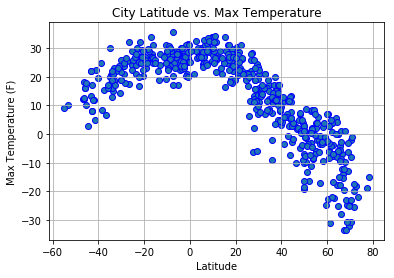

In [22]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Max Temp'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

In [23]:
data

{'coord': {'lon': 23.15, 'lat': 53.13},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': -1.9,
  'pressure': 999,
  'humidity': 67,
  'temp_min': -3.33,
  'temp_max': 0.56},
 'wind': {'speed': 3.92, 'deg': 286.501},
 'snow': {'3h': 0.005},
 'clouds': {'all': 48},
 'dt': 1552414004,
 'sys': {'type': 3,
  'id': 2000554,
  'message': 0.0051,
  'country': 'PL',
  'sunrise': 1552366098,
  'sunset': 1552408003},
 'id': 776069,
 'name': 'Bialystok',
 'cod': 200}